# WHEN YOU HAVE A PROJECT , NEEDS TO FOLLOW SOME STEP

1) Define the problems /questions

2) Data collection

3)Data cleaning like
 - handel the missing values (handle /delete)
 - handel the outlier
 - identify and remove the duplicates.
 -transform the data into suitable form

4)EDA (Exploratory data analysis)

5)Data visualization (use seaborn or other libraries)

6)Analyze the insight and report



In [84]:
import numpy as np

In [85]:
import pandas as pd

In [86]:
import matplotlib.pyplot as plt

In [87]:
import seaborn as sns

In [88]:
titanic=sns.load_dataset("titanic")  ## to load the data

In [89]:
titanic.head()   ##.head() :- for checking the data as a sample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [90]:
titanic.info()   ## info to check how many rows and column are available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [91]:
#As we can check,some are miising values in the data ,so lets checkthe exact number.

In [92]:
titanic.isnull().sum()  ## isnull().sum() :-- to check themissing values (exact number)

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


as we check ,
1) age-177 are missing values,should be imported basd on pclass or sex(because it is a numerical values replace with mean or median)

2) embarked town - 2 missing values can be filled with mode (because it is categorical values thats y we replace with mode)

3) deck-massive missing values (value in nun form,unavailble values in the dataset.better to drop this column.


In [93]:
## age filled with median based on pclass or sex

1).Transform :-- gives the value in series form (gives the result in same shape as the original data.

2) .apply :- make a data frame.

3).fillna :- if value is missing then it will fill the value.

4). drop :- it will drop or delete the value permantly.





In [94]:
titanic['age']=titanic.groupby(['pclass','sex'])['age'].transform(lambda x : x .fillna(x.median()))


1.   transform(lambda x: x.fillna(x.median())): For each group, it applies a function to fill in missing age values (NaNs). It fills these missing values with the median age of that specific group (same "pclass" and "sex").

The median is the middle value in a sorted list of numbers, so it's a good way to fill in missing data without being affected by extreme values (outliers).





In [95]:
## Replace embark with mode :- mode:- most frequent values

In [96]:
titanic['embarked'].mode()[0]  ## [0] is used to get the first value in that list, which is the most common value.


'S'

In [97]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0],inplace=True)

<ipython-input-97-e7bc3fa579ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0],inplace=True)


In [98]:
titanic["embarked"].isnull().sum()  ## for checking the missing values

np.int64(0)

In [99]:
##deck: drop the column (delete)

In [100]:
titanic.drop(columns=['deck'],inplace=True)

In [101]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [102]:
##drop the unwanted column (delete)

In [103]:
titanic.drop(columns=['alive','who','embark_town','adult_male'],inplace=True)

In [104]:
titanic.isnull().sum()  ##to check all the missing values

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
alone,0


In [105]:
# to check rows and column

In [106]:
titanic.shape

(891, 10)

After dropping the unwanted column,there are 891 rows ,describe the passanger details and 10 column which shows the passanger features.

In [107]:
titanic.describe(include='all')  # for statstical summary

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537
mean,0.383838,2.308642,NaN,29.112424,0.523008,0.381594,32.204208,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.304424,1.102743,0.806057,49.693429,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,21.500000,0.000000,0.000000,7.910400,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN


In [108]:
#check the data and write the insight

-- servival rate only 38% ,remaining 98% did not survive.

-- most of passanger were in third class.

-- most of passanger were young (median=26 year) (using 98-95-99.7% rule ,29+13(1st std)+13(2nd std),+13(3rd std)= 68 years (max age) --but shows 80years old also

-- It must be outlier in age becaue it is showing 80 years old also

-- fare=we will take  50% = 15+50(1st std)+50(2nd std)+50(3rd std)=165 ,and max fare was 512 (so outlier) ----------------------------------------------------
median fair 14.45 but max was 512.33.it also may contain the outliers(empirial rule)

embarked-most of passanger from "S"

Alone:- most of passanger travel alone.

class:- most passanger class were in third.


In [109]:
## to check duplicates with count

In [110]:
titanic.duplicated().sum()  ## it is alredy delted thats y showing like this but this is actual code before deleting

np.int64(118)

In [111]:
titanic.drop_duplicates(inplace=True)  ## deleting the duplicates

In [112]:
titanic.duplicated().sum()   ## remove all the duplicate values.

np.int64(0)

In [113]:
titanic.shape # to check rows and columns

(773, 10)

In [114]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,False
1,1,1,female,38.0,1,0,71.2833,C,First,False
2,1,3,female,26.0,0,0,7.9250,S,Third,True
3,1,1,female,35.0,1,0,53.1000,S,First,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True


# EDA (EXPLORATORY DATA ANALYSIS ) :- RAISE A QUES

Que 1) What is the overall distribution of passengers across different classes (Pclass)?

In [115]:
titanic['pclass'].unique()  # it is a categorical form because there is a limit ,
                           #To check the numbers of data present in the column.


array([3, 1, 2])

In [116]:
titanic['pclass'].value_counts()  #To check how many passanger count are there.

,count
pclass,
3,400
1,209
2,164


In [117]:
titanic['pclass'].value_counts().sort_index() ## sort in ascending order.

,count
pclass,
1,209
2,164
3,400


In [118]:
pclass_count=titanic['pclass'].value_counts().sort_index()


In [119]:
pclass_count

,count
pclass,
1,209
2,164
3,400


In [120]:
x=pclass_count.index  # to show the index

In [121]:
x

Index([1, 2, 3], dtype='int64', name='pclass')

In [122]:
y=pclass_count.values #to show the index values

In [123]:
y

array([209, 164, 400])

In [124]:
#Draw bar graph (category+numeric value)

<ipython-input-125-0ae335a8a1df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pclass_count,y=pclass_count,palette="bright")


Text(0.5, 1.0, 'distribution of passanger across different pclass')

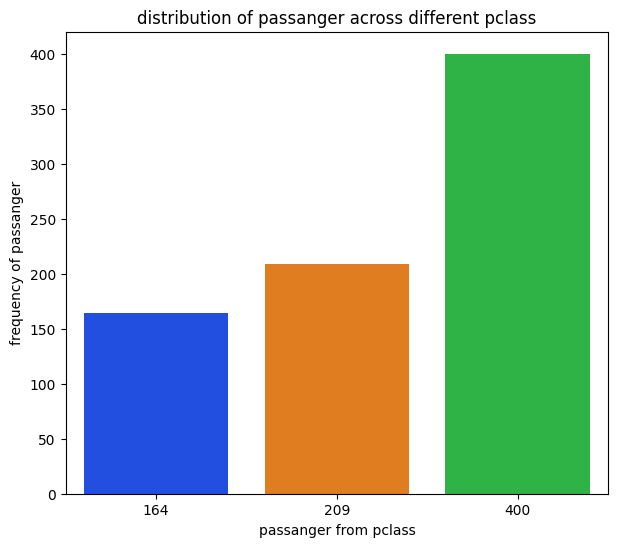

In [125]:
plt.figure(figsize=(7,6))
sns.barplot(x=pclass_count,y=pclass_count,palette="bright")
plt.xlabel("passanger from pclass")
plt.ylabel("frequency of passanger")
plt.title("distribution of passanger across different pclass")

# INSIGHTS FROM THE PCLASS Distribution::

--Majority of the passanger travelled in pclass 3,indicating it was a most affordable and popular.

--pclass 1 had the least number of passanger,suggesting that fewer peaple could afford luxury travel.

-- pclass 2 had moderate no of passanger showing a middle class passanger presence on the titanic.

***QUE -- 2)  How is the age of passengers distributed?***

---





In [126]:
# DRAW A HISTOGRAM PLOT ,WE WANT THE AGE DISTRIBUTION :---

Text(0.5, 1.0, 'age distribution of the passanger')

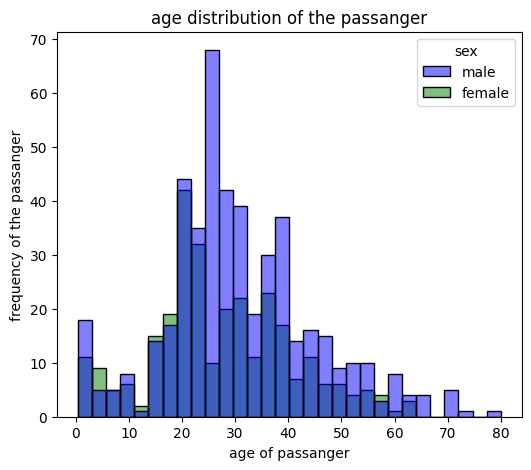

In [127]:
plt.figure(figsize=(6,5))
sns.histplot(data=titanic,x="age",bins=30,hue='sex',palette=['blue',"green"])
plt.xlabel("age of passanger")
plt.ylabel("frequency of the passanger")
plt.title("age distribution of the passanger")

# INSIGHT FROM THE AGE DISTRIBUTION :

-- the peak age group is 20-30 year. indicating many young adults travelled.

-- there are fewer childrens(age<10)  and elderly (age>60) on board.

-- the age distribution has a long tail,on the right indicating some passanger were much older (may be outlier) not supposed to be board.

QUE 3 )** What is the distribution of passengers based on Sex?**

In [128]:
titanic['sex'].unique()  # to check the data and categories

array(['male', 'female'], dtype=object)

In [129]:
titanic['sex'].value_counts()  # how many passanger are available

,count
sex,
male,482
female,291


In [130]:
gender_counts=titanic['sex'].value_counts()

In [131]:
gender_counts

,count
sex,
male,482
female,291


In [132]:
x=gender_counts.index  # show the index

In [133]:
x

Index(['male', 'female'], dtype='object', name='sex')

In [134]:
y=gender_counts.values #show the index values

In [135]:
y

array([482, 291])

In [136]:
#draw bar plot :---

<ipython-input-137-7f7abab4c8e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index,y=gender_counts.values,palette='hls')


Text(0.5, 1.0, 'distribution of passanger based on sex')

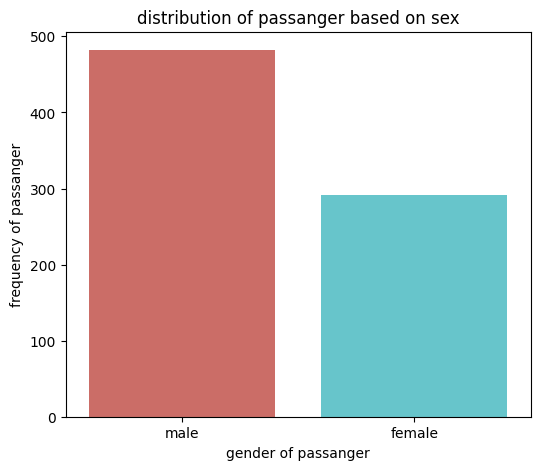

In [137]:
plt.figure(figsize=(6,5))
sns.barplot(x=gender_counts.index,y=gender_counts.values,palette='hls')
plt.xlabel("gender of passanger")
plt.ylabel('frequency of passanger')
plt.title('distribution of passanger based on sex')

## INSIGHT FROM THE GENDER DISTRIBUTION :--

-- dataset shows more male passanger travelled than female.

-- since the titanic was a mix emigrates,healthy workers,healthy passanger,men might have travelled more for work and opportunity.


**QUE 4) -How many passengers embarked from each port (Embarked)?**

In [138]:
titanic['embarked'].unique()  # to check the unique values from the data

array(['S', 'C', 'Q'], dtype=object)

In [139]:
#s= Southampton , c= cherbourg ,Q = queenstown

In [140]:
titanic['embarked'].value_counts() # how many values are present in the data

,count
embarked,
S,562
C,153
Q,58


In [141]:
embarked_counts=titanic['embarked'].value_counts()

In [142]:
embarked_counts

,count
embarked,
S,562
C,153
Q,58


In [143]:
#drwa bar plot :---

<ipython-input-144-13349405c874>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_counts.index,y=embarked_counts.values,palette="Set2")


Text(0.5, 1.0, 'number of passanger embarked from each port')

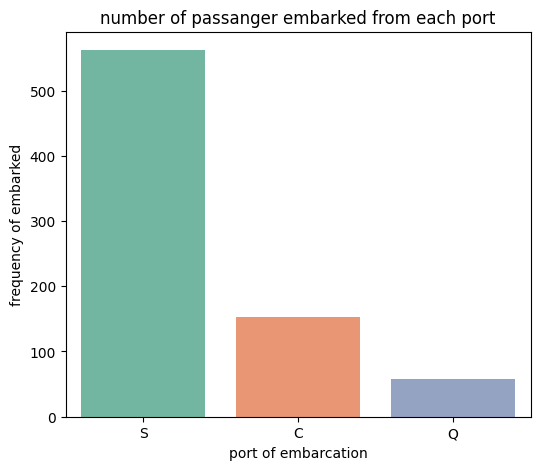

In [144]:
plt.figure(figsize=(6,5))
sns.barplot(x=embarked_counts.index,y=embarked_counts.values,palette="Set2")
plt.xlabel("port of embarcation")
plt.ylabel("frequency of embarked")
plt.title("number of passanger embarked from each port")

# INSIGHT FROM THE EMBARKED :---

-- majority of passanger embarked from s-southampton

-- moderate passanger embarked from c- cherburg.

Q -queenstown had least number of passanger.

**# QUE 5) What is the survival rate overall, and how does it vary by Pclass?**

In [145]:
## MIX QUE :-- rate jab bhi aata hai,us time mean nikalna hai.

In [146]:
overall_survival_rate=titanic['survived'].mean()*100  # when you want in percentage always mulply with 100

In [147]:
overall_survival_rate

np.float64(41.52652005174644)

In [148]:
survival_by_pclass=titanic.groupby(['pclass'])['survived'].mean()*100

In [149]:
survival_by_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


In [150]:
## DRAW BAR PLOT :---

<ipython-input-151-a45a6f283f7b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index,y=survival_by_pclass.values,palette="Set1")


Text(0.5, 1.0, 'survival rate by pclass')

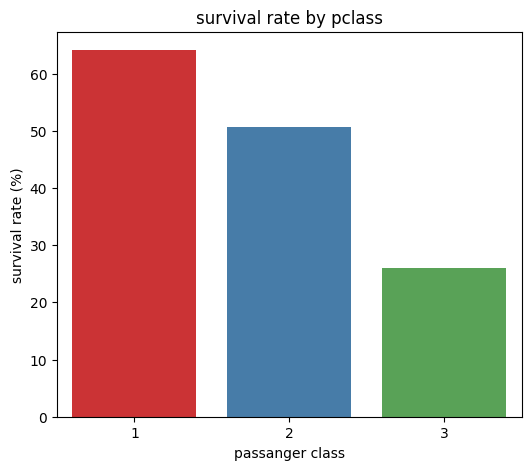

In [151]:
plt.figure(figsize=(6,5))
sns.barplot(x=survival_by_pclass.index,y=survival_by_pclass.values,palette="Set1")
plt.xlabel('passanger class')
plt.ylabel("survival rate (%)")
plt.title("survival rate by pclass")

## INSIGHT ON SURVIVAL RATE BY PCLASS :    

-- Only 41% of passanger survived ,indicating a high fatility rate.

-- 1st class had highest survival rate ~64% passanger had better access to lifeboats and safety.

--moderate survival rate in 2nd class ~50% some middle clas passanegr survived but not as many as pclass 1.

-- lowest survival rate in 3rd class ~26% passanger due to fewer safety resorces.

**# QUE 6) What is the survival rate for males vs. females?**




In [152]:
survival_by_gender=titanic.groupby('sex')["survived"].mean()*100   #we want rate of male and female,we need to use two columns thats why we used groupby.

In [153]:
survival_by_gender

,survived
sex,
female,73.883162
male,21.991701


In [154]:
# DRAW BAR PLOT

<ipython-input-155-07a37442242a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_gender.index,y=survival_by_gender.values,palette="hls")


Text(0.5, 1.0, 'survival rate for males vs. females')

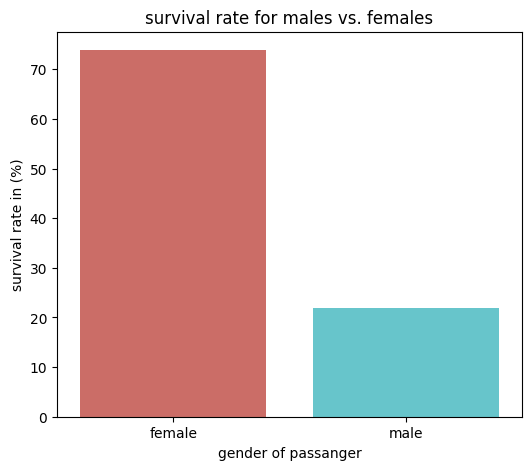

In [155]:
plt.figure(figsize=(6,5))
sns.barplot(x=survival_by_gender.index,y=survival_by_gender.values,palette="hls")
plt.xlabel("gender of passanger")
plt.ylabel("survival rate in (%)")
plt.title("survival rate for males vs. females")

# INSIGHTS ON SURVIVAL RATE ON GENDER

-- Females had a much higher survived rate (~74%)

-- women were prioritized during evacuation

-- Many first class and second class womens had a better access to lifeboats.

-- Males had very low survival rate (~21%)

-- Many did not get lifeboats due to evacuation policy.

**QUE 7) What is the survival rate for passengers from different embarkation points (Embarked)?**

In [156]:
survival_by_embarked=titanic.groupby('embarked')['survived'].mean()*100  # whenver use rate always need to find the mean first

In [157]:
survival_by_embarked

,survived
embarked,
C,58.823529
Q,34.482759
S,37.544484


In [158]:
#DRAW BAR PLOT

<ipython-input-159-fcf05885c015>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_embarked.index,y=survival_by_embarked.values,palette="hls")


Text(0.5, 1.0, 'survival rate for passengers from different embarkation points (Embarked)')

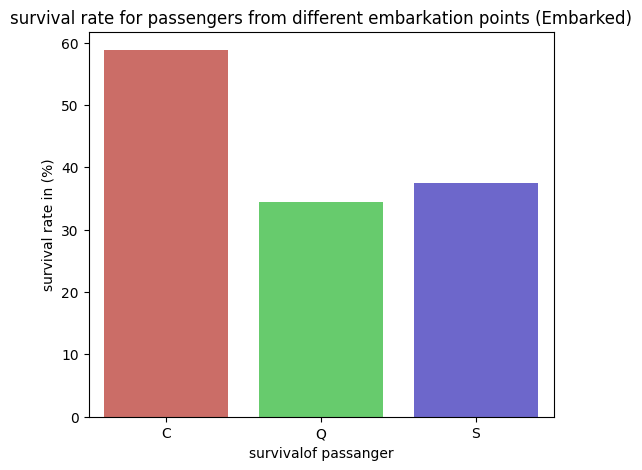

In [159]:
plt.figure(figsize=(6,5))
sns.barplot(x=survival_by_embarked.index,y=survival_by_embarked.values,palette="hls")
plt.xlabel("survivalof passanger")
plt.ylabel("survival rate in (%)")
plt.title("survival rate for passengers from different embarkation points (Embarked)")

# INSIGHTS SURVIVAL RATE ON EMBARKATION :  

-- passanger from c(chebourg) had a highest survival rate (~58%)

--Many first class passangers boarded from cherbourg,leading to a higher survival rate.

-- southampton had the highest number of third class passangers,which reduced survival chances.

-- most of the passanger from queenstown were in third class which had the worst survival rate.

**# QUE 8) How does the survival rate vary across different ticket classes (Pclass)?**

In [160]:
survival_by_pclass=titanic.groupby('pclass')['survived'].mean()*100  # rate need to find mean ,for percentage always multiply with 100

In [161]:
survival_by_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


In [162]:
#DRAW BAR PLOT

<ipython-input-163-596f19df1854>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index,y=survival_by_pclass.values,palette="Set2")


Text(0.5, 1.0, ' survival rate vary across different ticket classes (Pclass)')

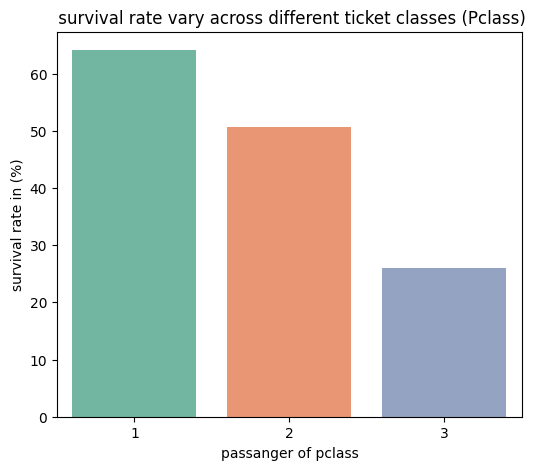

In [163]:
plt.figure(figsize=(6,5))
sns.barplot(x=survival_by_pclass.index,y=survival_by_pclass.values,palette="Set2")
plt.xlabel("passanger of pclass")
plt.ylabel("survival rate in (%)")
plt.title(" survival rate vary across different ticket classes (Pclass)")

# INSIGHT ON SURVIVAL RATE ON PCLASS

-- 1st Class (Pclass 1) : Highest Survival Rate (~60%+)
-First-class passengers had the highest survival rate, above 60%.
-Priority access to lifeboats due to wealth and social status.
-Cabins were located on upper decks, making evacuation easier.
-Better assistance from crew members in emergencies.

2nd Class (Pclass 2) : Moderate Survival Rate (~50%)
--Second-class passengers had a lower survival rate than first class but still significantly higher than third class.
-Some access to lifeboats, but not prioritized as highly as first class.
-Cabins were in the middle decks, making evacuation possible but not as easy.
-Moderate social status meant some preference in rescue operations

3rd Class (Pclass 3) : Lowest Survival Rate (~25-30%)
--Third-class passengers had the lowest survival rate, below 30%.
-Cabins were located in lower decks, making escape difficult as water flooded -the ship.
-Limited access to lifeboats, as priority was given to upper-class passengers.
-Physical barriers and locked gates restricted movement to upper decks.
-Lower social status meant they were the last to receive assistance.

**QUE 9) Is there any relationship between the number of siblings/spouses aboard (SibSp) and survival?**

In [164]:
survival_by_sibsp=titanic.groupby('sibsp')["survived"].mean()*100

In [165]:
survival_by_sibsp

,survived
sibsp,
0,38.658777
1,53.000000
2,44.444444
3,28.571429
4,16.666667
5,0.000000
8,0.000000


In [166]:
#DRAW A BAR PLOT

<ipython-input-167-f0834c0220b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_sibsp.index,y=survival_by_sibsp.values,palette="hls")


Text(0.5, 1.0, 'survival rate by sibsp')

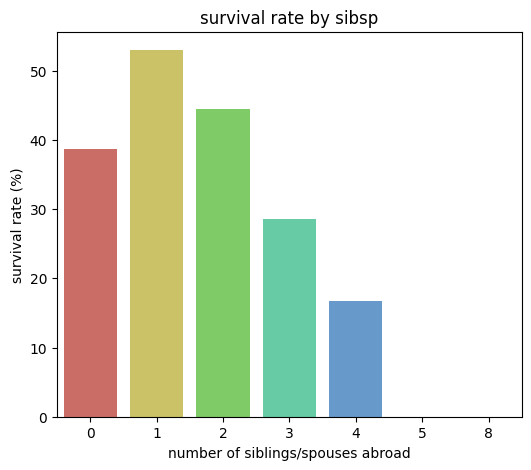

In [167]:
plt.figure(figsize=(6,5))
sns.barplot(x=survival_by_sibsp.index,y=survival_by_sibsp.values,palette="hls")
plt.xlabel("number of siblings/spouses abroad")
plt.ylabel("survival rate (%)")
plt.title("survival rate by sibsp")

INSIGHT ON SURVIVAL RATE BY SIBSP:

-- Best survival rate:- small families(1-2 sibsp)
-
-- worst survival rate :- large families (3+ sibsp)

no surviours :- passanger with ()5 + sibsp.

**QUE 10 ) How does the number of parents/children aboard (Parch) affect survival?**

In [168]:
survival_by_parch=titanic.groupby('parch')["survived"].mean()*100

In [169]:
survival_by_parch

,survived
parch,
0,37.609842
1,55.263158
2,53.333333
3,60.000000
4,0.000000
5,20.000000
6,0.000000


In [170]:
#DRAW BAR PLOT

<ipython-input-171-556d4f0f5eac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_parch.index,y=survival_by_parch.values,palette="hls")


Text(0.5, 1.0, 'survival rate by parch')

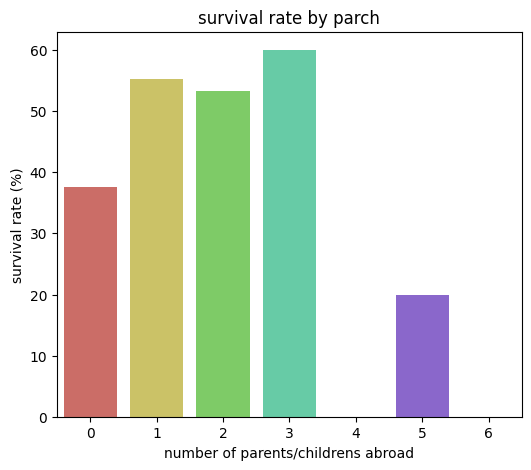

In [171]:
plt.figure(figsize=(6,5))
sns.barplot(x=survival_by_parch.index,y=survival_by_parch.values,palette="hls")
plt.xlabel("number of parents/childrens abroad")
plt.ylabel("survival rate (%)")
plt.title("survival rate by parch")

# INSIGHTS ON SURVIVAL BY PARCH

--Passengers with 1–3 Parents/Children Had Higher Survival Rates (~53–60%)
Families with small children or parents may have received priority during evacuation. They likely got more assistance and access to lifeboats.

--Passengers Traveling Alone (Parch = 0) Had Lower Survival (~37.6%)

--Traveling alone reduced chances of getting help. They were less likely to be prioritized.

--Passengers with 4+ Parch Had the Worst Survival Rates (0-20%)

--Large families likely struggled to stay together. Difficulty in securing spots for all members in lifeboats. Parch = 4 & 6 had 0% survival, indicating entire families perished.

#NUMERICAL ANALYSIC


**QUE 11) How does the fare distribution vary across different passenger classes (Pclass)?**

In [172]:
#Let check the fare distribution contain outlier or not with pcclass.

<ipython-input-173-bdef65a7df74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic,x="pclass",y="fare",palette="pastel")


Text(0.5, 1.0, 'fare distribution vary across different passenger classes (Pclass)')

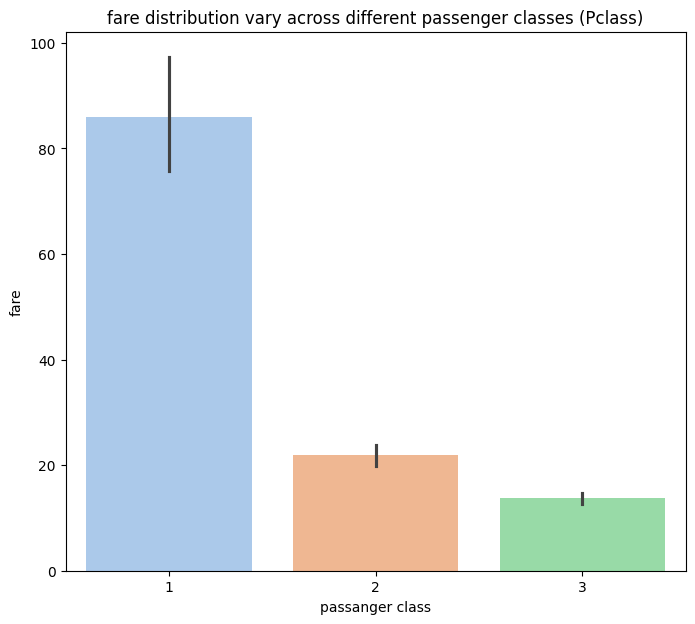

In [173]:
plt.figure(figsize=(8,7))
sns.barplot(data=titanic,x="pclass",y="fare",palette="pastel")
plt.xlabel("passanger class")
plt.ylabel("fare")
plt.title("fare distribution vary across different passenger classes (Pclass)")

In [174]:
# as we check ,distribution contain the outliers,so lets check the outliers.

In [175]:
titanic.groupby("pclass")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,209.0,86.000578,78.905683,0.0,32.3208,61.9792,106.425,512.3292
2,164.0,21.889279,13.498846,0.0,13.0000,18.7500,26.000,73.5000
3,400.0,13.733999,10.710465,0.0,7.7750,8.0500,15.900,69.5500


In [176]:
Q1=titanic.groupby("pclass")["fare"].quantile(0.25)  # whenever we want to find qunatile ,always use .quantile for the exact value.


In [177]:
Q2= titanic.groupby("pclass")["fare"].quantile(0.50)

In [178]:
Q3=titanic.groupby('pclass')["fare"].quantile(0.75)

In [179]:
IQR=Q3-Q1

In [180]:
lower_bound=Q1-1.5*IQR

In [181]:
higher_bound=Q3+1.5*IQR

In [182]:
higher_bound

,fare
pclass,
1,217.5813
2,45.5000
3,28.0875


In [183]:
# DRAW HISTOGRAM PLOT

Text(0.5, 1.0, 'fare distribution by pclass')

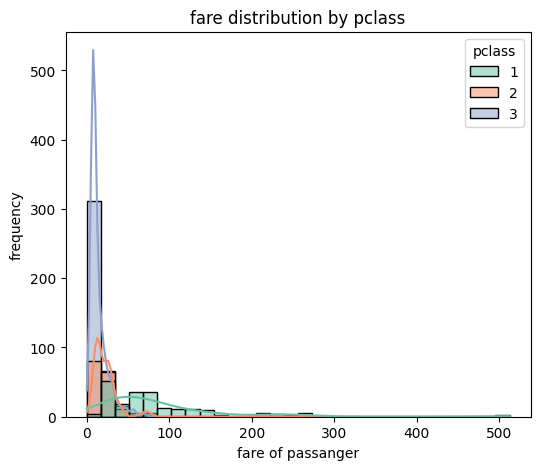

In [184]:
plt.figure(figsize=(6,5))
sns.histplot(data=titanic,x="fare",bins=30,palette="Set2",kde=True,hue="pclass")
plt.xlabel("fare of passanger")
plt.ylabel("frequency")
plt.title("fare distribution by pclass")

In [185]:
#remove the fare outlier

In [186]:
Q1=titanic["fare"].quantile(0.25)

In [187]:
Q2=titanic["fare"].quantile(0.50)

In [188]:
Q3=titanic["fare"].quantile(0.75)

In [189]:
IQR=Q3-Q1

In [190]:
lower_bound=Q1-1.5*IQR

In [191]:
higher_bound=Q3+1.5*IQR

In [192]:
titanic_clean=titanic[(titanic["fare"]>=lower_bound)&(titanic['fare']<=higher_bound)]

In [193]:
titanic_clean.groupby("pclass")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,112.0,39.568975,15.585120,0.0,26.550,34.8271,52.5542,71.2833
2,164.0,21.889279,13.498846,0.0,13.000,18.7500,26.0000,73.5000
3,400.0,13.733999,10.710465,0.0,7.775,8.0500,15.9000,69.5500


Text(0.5, 1.0, 'fare distribution by pclass')

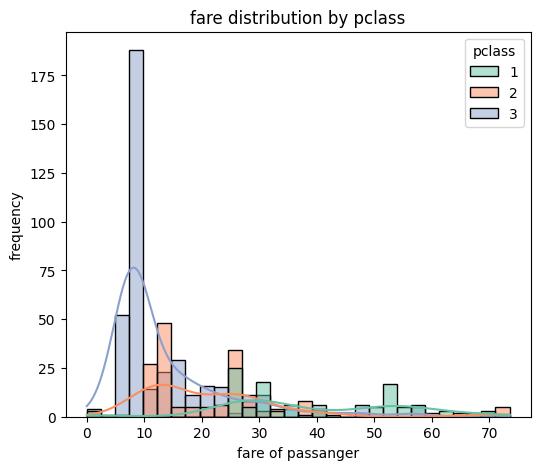

In [194]:
plt.figure(figsize=(6,5))
sns.histplot(data=titanic_clean,x="fare",bins=30,palette="Set2",kde=True,hue="pclass")
plt.xlabel("fare of passanger")
plt.ylabel("frequency")
plt.title("fare distribution by pclass")

In [195]:
#draw boxplot for outlier

<ipython-input-196-bc76dedcfeea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_clean,x="pclass",y="fare",palette="pastel")


Text(0.5, 1.0, 'fare distribution vary across different passenger classes (Pclass)')

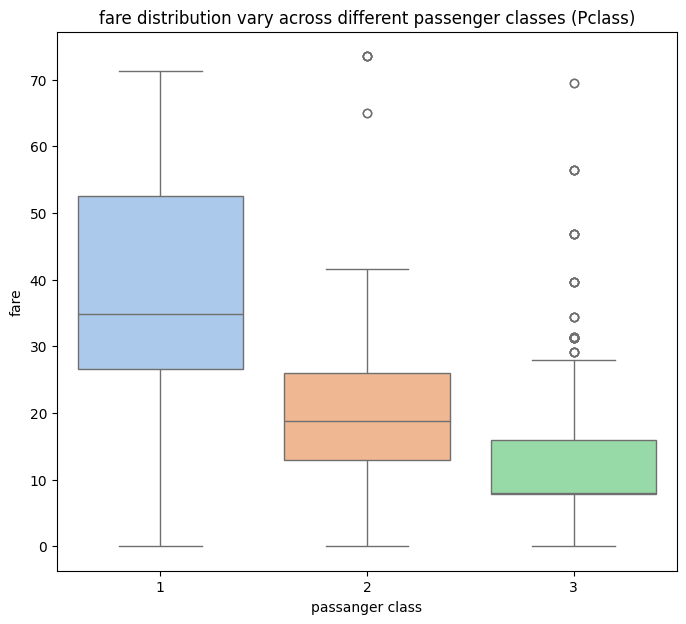

In [196]:
plt.figure(figsize=(8,7))
sns.boxplot(data=titanic_clean,x="pclass",y="fare",palette="pastel")
plt.xlabel("passanger class")
plt.ylabel("fare")
plt.title("fare distribution vary across different passenger classes (Pclass)")

# REMOVE THE OUTLIERS IN FARE BY PCLASS


pclass :  

1) 217.5813

2)45.5000

3)28.0875

In [197]:
upper_bond_dict={1:217.5813,2:45.5000,3:28.0875}

In [198]:
titanic["pclass"].unique()

array([3, 1, 2])

In [199]:
titanic_latest = titanic[
   ((titanic['pclass'] == 1) & (titanic['fare'] <= upper_bond_dict[1])) |
    ((titanic['pclass'] == 2) & (titanic['fare'] <= upper_bond_dict[2])) |
    ((titanic['pclass'] == 3) & (titanic['fare'] <= upper_bond_dict[3]))
]


In [200]:
#DRAW BOXPLOT

<ipython-input-201-64f5eee12d4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titanic_latest , x='pclass', y ='fare', palette='pastel')


Text(0.5, 1.0, 'fare distribution accross passenger class')

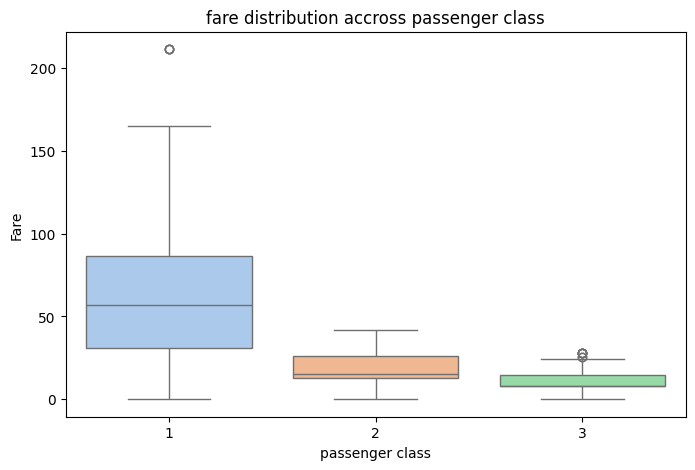

In [201]:
plt.figure(figsize =(8,5))
sns.boxplot(data = titanic_latest , x='pclass', y ='fare', palette='pastel')
plt.xlabel("passenger class")
plt.ylabel("Fare")
plt.title("fare distribution accross passenger class")

# Insights:
Passenger Class 1 (Luxury Class):

The highest median fare is observed in this class.
The fare range is wide, indicating more variability in ticket prices.
There are several outliers (dots above the whiskers), showing a few passengers paid significantly higher fares.
Passenger Class 2 (Middle Class):

The median fare is much lower than Class 1.
The interquartile range (IQR) is smaller, indicating less variability.
Few outliers are present, showing some higher fares but not as extreme as Class 1.
Passenger Class 3 (Economy Class):

The lowest median fare among all classes.
Very small IQR, meaning fares were quite consistent.
A few outliers are present, but the range is still lower compared to the other two classes.

**# QUE 12) What is the relationship between the age and survival rate ?**

In [202]:
titanic['age'].unique()  # for checking the data   # this is continous feature

array([22.  , 38.  , 26.  , 35.  , 25.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 30.  , 31.  , 21.5 , 34.  ,
       15.  , 28.  ,  8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,
        3.  ,  7.  , 49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  ,
       17.  , 32.  , 16.  ,  0.83, 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [203]:
# change this continuous features into categorical.(converted into bins)

In [204]:
x=[0,10,20,30,40,50,60,70,80]
y=["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80"]

In [205]:
# use pd.cut for breaking

In [206]:
titanic['age_group']= pd.cut(titanic["age"],bins=x,labels=y)


In [207]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,False,21-30
1,1,1,female,38.0,1,0,71.2833,C,First,False,31-40
2,1,3,female,26.0,0,0,7.9250,S,Third,True,21-30
3,1,1,female,35.0,1,0,53.1000,S,First,False,31-40
4,0,3,male,35.0,0,0,8.0500,S,Third,True,31-40


In [208]:
age_survival=titanic.groupby("age_group")["survived"].mean()*100

<ipython-input-208-771964f86670>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival=titanic.groupby("age_group")["survived"].mean()*100


In [209]:
age_survival

,survived
age_group,
0-10,58.730159
11-20,40.366972
21-30,37.588652
31-40,46.511628
41-50,38.095238
51-60,40.476190
61-70,25.000000
71-80,20.000000


In [210]:
#drwa bar plot

<ipython-input-211-9ad6ed3ba99b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_survival.index,y=age_survival.values,palette="Set1")


Text(0.5, 1.0, 'survival rate by age group')

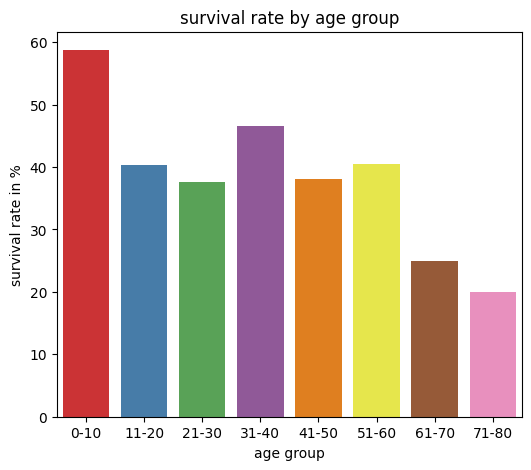

In [211]:
plt.figure(figsize=(6,5))
sns.barplot(x=age_survival.index,y=age_survival.values,palette="Set1")
plt.xlabel("age group")
plt.ylabel("survival rate in %")
plt.title("survival rate by age group")

# Insights from the Survival Rate by Age Group Bar Chart:
--Highest Survival Rate (0-10 years):

--The age group 0-10 has the highest survival rate, around 60%.
This suggests that children were prioritized during rescue efforts, possibly due to the "women and children first" policy.
Moderate Survival Rates (11-60 years):

--Age groups 11-20, 21-30, 31-40, 41-50, and 51-60 show survival rates between 35-50%.
These groups likely included a mix of passengers who had varying levels of access to lifeboats.
Lowest Survival Rate (61+ years):

--The survival rate drops significantly for 61-70 and 71-80 age groups, with rates below 30%.
This could be due to reduced mobility or lower priority during rescue efforts.



**# QUE 13) WHAT IS THE CORRELATION FARE,PCLASS AND SURVIVAL ?**

In [212]:
corr_matrix=titanic[['fare','pclass','survived']].corr()# to check co-relation

In [213]:
corr_matrix

,fare,pclass,survived
fare,1.000000,-0.554939,0.244176
pclass,-0.554939,1.000000,-0.336633
survived,0.244176,-0.336633,1.000000


In [214]:
# Draw HEATMAP

Text(0.5, 1.0, 'correlation of fare,pclass and survived')

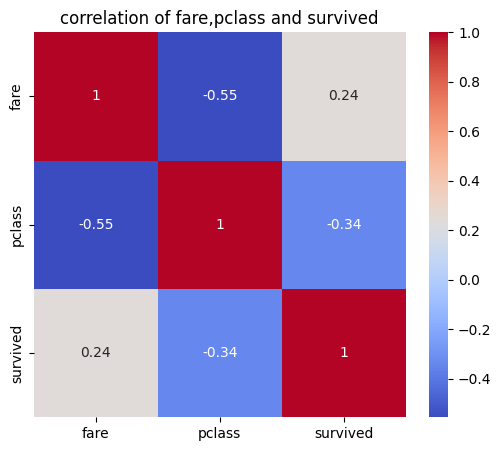

In [215]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("correlation of fare,pclass and survived")

# Insights from the Correlation Heatmap (Fare, Passenger Class, and Survival Rate)
--Fare vs Passenger Class (-0.55 Correlation)

-There is a strong negative correlation between fare and passenger class (-0.55).
This means that higher-class passengers (lower class numbers, e.g., 1st class) paid higher fares, while lower-class passengers (e.g., 3rd class) paid lower fares.
Fare vs Survival Rate (+0.24 Correlation)

-A positive correlation (0.24) between fare and survival rate suggests that passengers who paid higher fares had a higher chance of survival.
This implies that 1st-class passengers had better access to lifeboats, aligning with historical accounts.
Passenger Class vs Survival Rate (-0.34 Correlation)

-A negative correlation (-0.34) between passenger class and survival means that passengers in higher classes (1st class) had a better survival rate, while those in lower classes (3rd class) had lower survival rates.
This further supports the notion that 1st-class passengers were prioritized during evacuation.

**#QUE 14) WHAT ARE THE AGE RANGES OF SURVIVOURS VS NON SURVIVOURS ?**

In [216]:
#Draw boxplot for outliers

<ipython-input-217-7186105d134b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic,x="survived",y="age",palette="Set1")


Text(0.5, 1.0, 'age comparison of survival vs non survival')

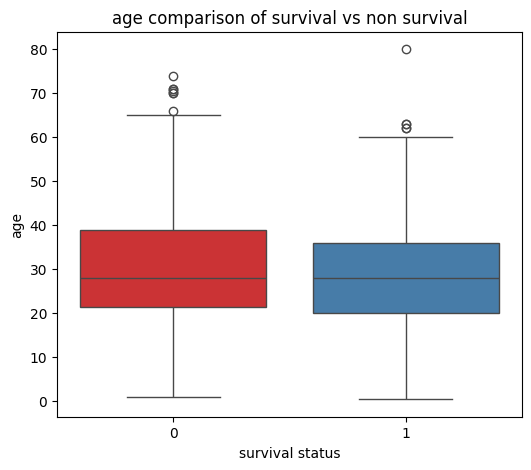

In [217]:
plt.figure(figsize=(6,5))
sns.boxplot(data=titanic,x="survived",y="age",palette="Set1")
plt.xlabel("survival status")
plt.ylabel("age")
plt.title("age comparison of survival vs non survival")

In [218]:
#as we see the distribution contain the outliers ,so lets check the outliers.

# outlier in short :- if we have string like
age= [1,5,6,10,15,80,99,-1,-10,-15] >>>> -1,-10,-15 are the outliers

so we need to find out the Q1,Q3,IQR,LOWER
_BOUND AND UPPER BOUND

and draw the boxplot


In [219]:
Q1=titanic["age"].quantile(0.25)

In [220]:
Q3=titanic['age'].quantile(0.75)

In [221]:
IQR=Q3-Q1

In [222]:
lower_bound=Q1-1.5*IQR

In [223]:
upper_bound=Q3+1.5*IQR

In [224]:
titanic_clean1=titanic[(titanic["age"]>=lower_bound) &   ##for cleaning the data
                        (titanic["age"]<=upper_bound)]

<ipython-input-225-2a85ea8de69b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_clean1,x="survived",y="age",palette="Set1")


Text(0.5, 1.0, 'age comparison between survival and non survival')

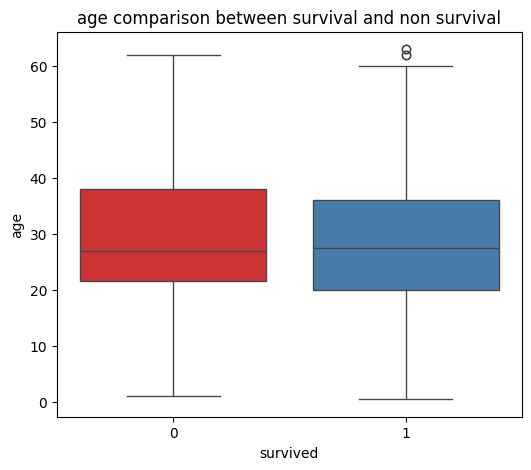

In [225]:
plt.figure(figsize=(6,5))
sns.boxplot(data=titanic_clean1,x="survived",y="age",palette="Set1")
plt.title("age comparison between survival and non survival")


In [226]:
#just for practise on find the outlier

Q1=titanic["age"].quantile(0.25)

In [227]:
Q3=titanic["age"].quantile(0.75)

In [228]:
IQR=Q3-Q1

In [229]:
lower_bound1=Q1-1.5*IQR

In [230]:
upper_bound1=Q3+1.5*IQR

In [231]:
titanic_latest1 = titanic[(titanic["age"]>=lower_bound1) &
                          (titanic["age"]<=upper_bound1)]

<ipython-input-232-85acc0b5b7e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_latest1,x="survived",y="age",palette="Set2")


<Axes: xlabel='survived', ylabel='age'>

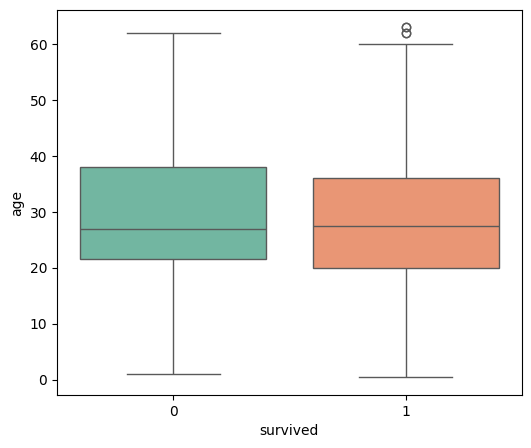

In [232]:
plt.figure(figsize=(6,5))
sns.boxplot(data=titanic_latest1,x="survived",y="age",palette="Set2")

QUE-- 15)Are younger passanger more likely to survive compared to older passangers?

In [233]:
titanic.head(1)  # always need to check this because we wanted to check which columns are available

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group
0,0,3,male,22.0,1,0,7.25,S,Third,False,21-30


In [234]:
titanic["age_group"].unique()   # to check the unique data

['21-30', '31-40', '51-60', '0-10', '11-20', '61-70', '41-50', '71-80']
Categories (8, object): ['0-10' < '11-20' < '21-30' < '31-40' < '41-50' < '51-60' < '61-70' < '71-80']

In [235]:
age_survival=titanic.groupby("age_group")["survived"].mean()*100  # need to find the mean

<ipython-input-235-70b13fec39ce>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival=titanic.groupby("age_group")["survived"].mean()*100  # need to find the mean


In [236]:
age_survival

,survived
age_group,
0-10,58.730159
11-20,40.366972
21-30,37.588652
31-40,46.511628
41-50,38.095238
51-60,40.476190
61-70,25.000000
71-80,20.000000


## INSIGHTS
--- younger passanger (0-10)had highest survival rate ~58.73%

--- elderly passanger (above 0) had the lowest survical rate ~ 25%

**GROUPWISE ANALYSIS : **

QUE 16)   What is the survival rate for families (passanger with sibsp or parch>0 vs solo passangers.

In [237]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group
0,0,3,male,22.0,1,0,7.25,S,Third,False,21-30


In [238]:
survival_rate_for_family=titanic.groupby("alone")['survived'].mean()*100

In [239]:
survival_rate_for_family

,survived
alone,
False,51.038576
True,34.174312


In [240]:
survival_rate_for_family.index=["family travellers","solo travellers"]  #need to change the index

In [241]:
survival_rate_for_family

,survived
family travellers,51.038576
solo travellers,34.174312


In [242]:
#DRAW BARPLOT

<ipython-input-243-a9a097b86ce2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_for_family.index,y=survival_rate_for_family.values,palette="Set1")


<Axes: xlabel='None'>

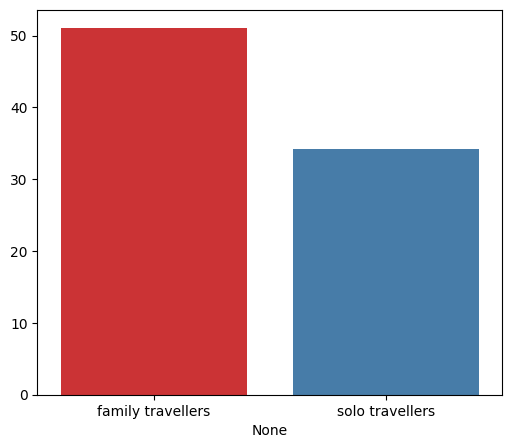

In [243]:
plt.figure(figsize=(6,5))
sns.barplot(x=survival_rate_for_family.index,y=survival_rate_for_family.values,palette="Set1")


##INSIGHTS

-- family travellers had better chance of survival ~51% compared to solo travellers ~34%

QUE 17) what is the distribution of family sizes among passangers and how does it affect survival ?

In [244]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group
0,0,3,male,22.0,1,0,7.25,S,Third,False,21-30


In [245]:
#creating a family_sizes column because we need to know how many childs and sibling are with them

In [246]:
titanic["family_size"]=titanic["sibsp"]+titanic["parch"]+1

In [247]:
titanic.head(1) # need to check ,columns has been added or not

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group,family_size
0,0,3,male,22.0,1,0,7.25,S,Third,False,21-30,2


In [248]:
titanic["family_size"].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [249]:
titanic["family_size"].value_counts()  # for checking how many data are aailable

,count
family_size,
1,436
2,153
3,101
4,28
6,22
5,13
7,12
8,6
11,2


In [250]:
# Draw count plot

<ipython-input-251-54efac474a4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic["family_size"],palette="coolwarm")


<Axes: xlabel='family_size', ylabel='count'>

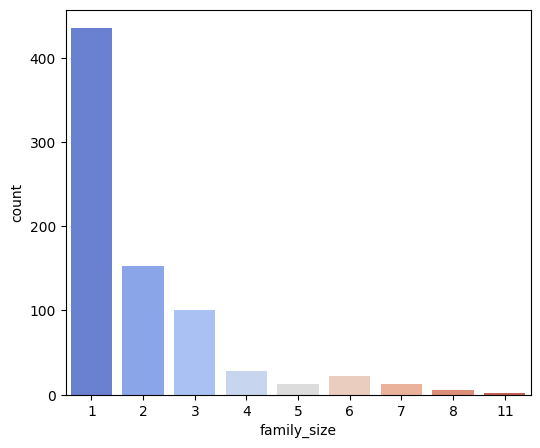

In [251]:
plt.figure(figsize=(6,5))
sns.countplot(x=titanic["family_size"],palette="coolwarm")

In [252]:
survival_family_size=titanic.groupby("family_size")["survived"].mean()*100

In [253]:
survival_family_size

,survived
family_size,
1,34.174312
2,54.901961
3,57.425743
4,71.428571
5,23.076923
6,13.636364
7,33.333333
8,0.000000
11,0.000000


In [254]:
#DRAW BAR PLOT

<ipython-input-255-029a7e89dc8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_family_size.index,y=survival_family_size.values,palette="Set1")


<Axes: xlabel='family_size'>

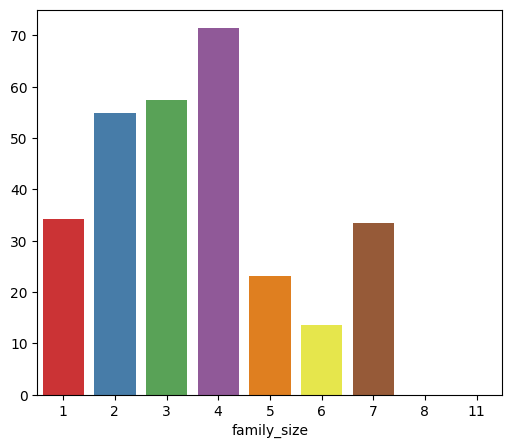

In [255]:
plt.figure(figsize=(6,5))
sns.barplot(x=survival_family_size.index,y=survival_family_size.values,palette="Set1")

# INSIGHTS :      
-- single travellers had lowers survival rate.

-- small families (2,3,4)had highest survival rate ~50 to 70%

--- large family had much lower survival rate.

**QUE 18) how does survival differ for passangers who paid exceptionally high fares(fare outliers)**

<Axes: ylabel='fare'>

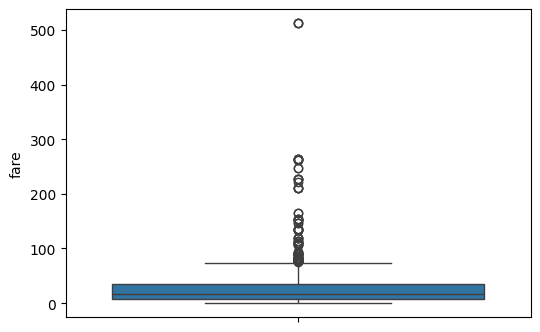

In [256]:
plt.figure(figsize=(6,4))
sns.boxplot(titanic["fare"])

In [257]:
titanic["fare"].describe()

,fare
count,773.000000
mean,35.003315
std,52.443053
min,0.000000
25%,8.050000
50%,16.100000
75%,34.375000
max,512.329200


In [258]:
Q1=titanic["fare"].quantile(0.25)

In [259]:
Q3=titanic["fare"].quantile(0.75)

In [260]:
IQR=Q3-Q1

In [261]:
upper_bound=Q3+1.5*IQR  # we need to find only upper bound value

In [262]:
upper_bound

np.float64(73.8625)

In [263]:
titanic['high_fare']=np.where(titanic["fare"]>=upper_bound,1,0)

In [264]:
titanic.sample(10)  # for chcking the data in shuffle form by using sample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group,family_size,high_fare
326,0,3,male,61.0,0,0,6.2375,S,Third,True,61-70,1,0
653,1,3,female,21.5,0,0,7.8292,Q,Third,True,21-30,1,0
548,0,3,male,33.0,1,1,20.5250,S,Third,False,31-40,3,0
433,0,3,male,17.0,0,0,7.1250,S,Third,True,11-20,1,0
876,0,3,male,20.0,0,0,9.8458,S,Third,True,11-20,1,0
534,0,3,female,30.0,0,0,8.6625,S,Third,True,21-30,1,0
537,1,1,female,30.0,0,0,106.4250,C,First,True,21-30,1,1
374,0,3,female,3.0,3,1,21.0750,S,Third,False,0-10,5,0
197,0,3,male,42.0,0,1,8.4042,S,Third,False,41-50,2,0
680,0,3,female,21.5,0,0,8.1375,Q,Third,True,21-30,1,0


In [265]:
survival_rate=titanic.groupby("high_fare")["survived"].mean()*100

In [266]:
survival_rate

,survived
high_fare,
0,36.538462
1,76.288660


In [267]:
#draw barplot

<ipython-input-268-ef8a1a329937>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate.index,y=survival_rate.values,palette="Set1")


Text(0.5, 1.0, 'survival rate-0: normal vs 1-high fare passanger')

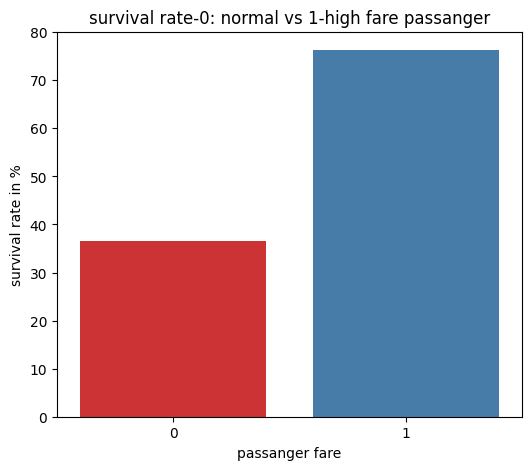

In [268]:
plt.figure(figsize=(6,5))
sns.barplot(x=survival_rate.index,y=survival_rate.values,palette="Set1")
plt.xlabel("passanger fare")
plt.ylabel("survival rate in %")
plt.title("survival rate-0: normal vs 1-high fare passanger")

## INSIGHTS
-- normal fare passager survival rate is~ 36%

-- these passanger were mostly in 2nd and 3rd class,with lower priprity for lifeboats.

-- high fare passanger survival rate ~76%

--these passanger where likely in 1st and better local and lifeboats access.

**QUE 19) Are there any gender based differences in survival within each class (pclass)**

In [272]:
gender_pclass_survival=titanic.groupby(["pclass","sex"])['survived'].mean().unstack()*100    #unstack used for arrange data in proper manner

In [273]:
gender_pclass_survival

sex,female,male
pclass,,
1,96.739130,38.461538
2,91.666667,18.478261
3,47.244094,16.117216


In [274]:
#draw bar plot

Text(0.5, 1.0, 'survival rate by gender with each class')

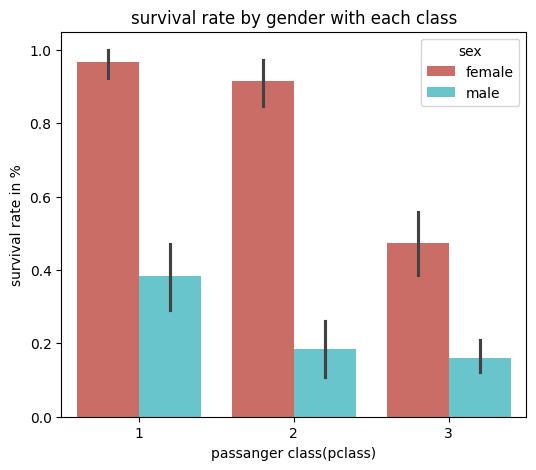

In [280]:
plt.figure(figsize=(6,5))
sns.barplot(data=titanic,x="pclass",y="survived",hue="sex",palette="hls")
plt.xlabel("passanger class(pclass)")
plt.ylabel("survival rate in %")
plt.title("survival rate by gender with each class")

# INSIGHTS

-- women in 1st and 2nd class had survived rate above ~90% showing strong priority in lifeboats rather than male passanger.

--3rd class women had also priority but less than 1st and 2nd class women.survived rate approx ~47% only and male in all classes had less priority.

**QUE 20) how does survival vary among passanger who embarked from different ports(embarked)within the same class?**

In [281]:
embarked_pclass_survival=titanic.groupby(["pclass","embarked"])["survived"].mean()*100

In [283]:
embarked_pclass_survival.unstack()  # unstack= arrange the data in proper manner

embarked,C,Q,S
pclass,,,
1,70.731707,50.000000,60.000000
2,52.941176,66.666667,50.000000
3,42.592593,32.075472,21.843003


In [284]:
#draw bar plot

Text(0.5, 1.0, 'survival rate by embarked with each class')

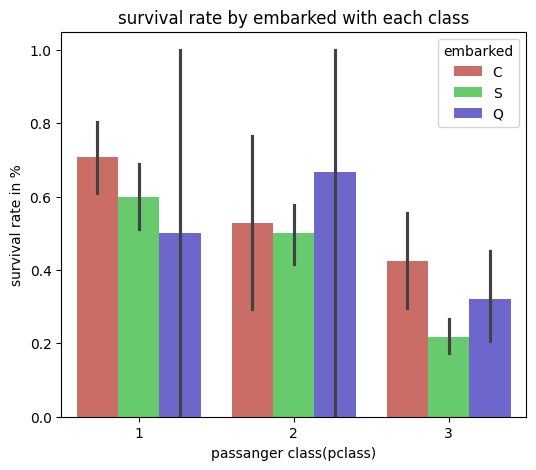

In [287]:
plt.figure(figsize=(6,5))
sns.barplot(data=titanic,x="pclass",y="survived",hue="embarked",palette="hls")
plt.xlabel("passanger class(pclass)")
plt.ylabel("survival rate in %")
plt.title("survival rate by embarked with each class")

## INSIGHTS

--ffirst class passanger from chembourg had the highest survival rate ~ 70%

-- 2nd class passanger from ueenstown had the highest survival ate ~60%

-- 3rd class passanger from cherburg had highest were southampton had lowest survival rate ~21%

-- overall passanger from cherbourg had better survival chnaces in most classes.

***VISUALIZATION-FOCUSED ANALYSIS***

QUE 21) create a heatmap to visualize the correlation between numeric features.

In [288]:
corr_matrix=titanic.corr(numeric_only=True)

In [289]:
corr_matrix

,survived,pclass,age,sibsp,parch,fare,alone,family_size,high_fare
survived,1.000000,-0.336633,-0.074413,-0.041987,0.067514,0.244176,-0.169709,0.009960,0.267225
pclass,-0.336633,1.000000,-0.397498,0.088753,0.038709,-0.554939,0.110988,0.079076,-0.554124
age,-0.074413,-0.397498,1.000000,-0.289343,-0.189057,0.114124,0.200088,-0.292488,0.146601
sibsp,-0.041987,0.088753,-0.289343,1.000000,0.379745,0.132237,-0.607515,0.859834,0.038146
parch,0.067514,0.038709,-0.189057,0.379745,1.000000,0.189811,-0.570499,0.798845,0.084026
fare,0.244176,-0.554939,0.114124,0.132237,0.189811,1.000000,-0.242704,0.190746,0.756092
alone,-0.169709,0.110988,0.200088,-0.607515,-0.570499,-0.242704,1.000000,-0.709902,-0.194608
family_size,0.009960,0.079076,-0.292488,0.859834,0.798845,0.190746,-0.709902,1.000000,0.071179
high_fare,0.267225,-0.554124,0.146601,0.038146,0.084026,0.756092,-0.194608,0.071179,1.000000


In [290]:
#draw heatmap

Text(0.5, 1.0, 'correlation heatmap of titanic features')

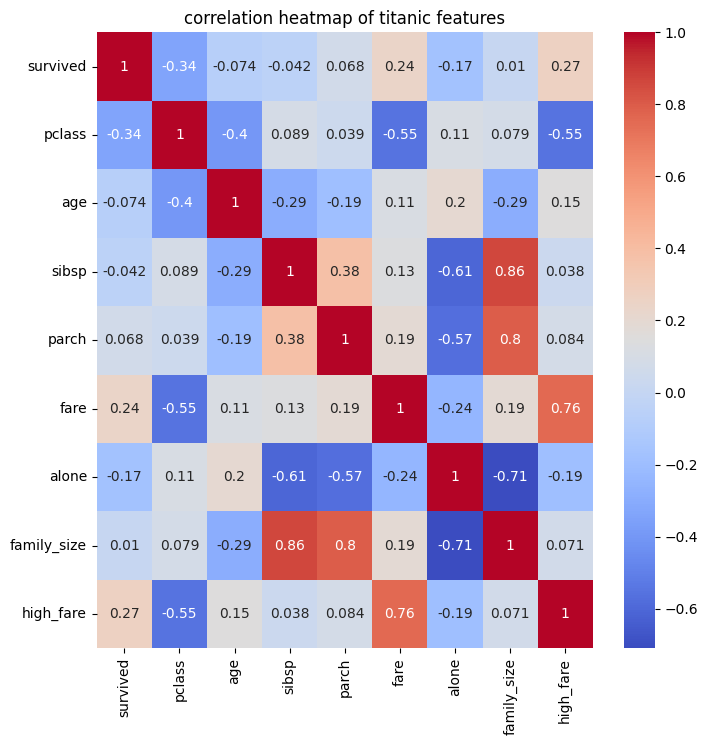

In [299]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("correlation heatmap of titanic features")

## INSIGHTS

--If Fare and Pclass show a strong negative correlation, it indicates higher-class passengers paid more.

--If Age and Fare show a correlation, it may suggest older passengers paid more.
Survival Relation

--A positive correlation between Survived and Fare → Higher-paying passengers had better survival chances.

--A negative correlation between Survived and Pclass → Lower-class passengers had lower survival rates.

Weak Correlations

--Some features might have near-zero correlation, meaning they do not influence each other directly.